## IMPORTING DATASET


In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## IMPORTING DATA

In [13]:
data =pd.read_csv('Titanic-Dataset.csv')
print(f'Titatinc dataset:\n{data.head()}')

Titatinc dataset:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500  

## DATA MANIPULATION AND DATA CLEANING

CREATING DATAFRAME

In [14]:
df =pd.DataFrame(data)
print(f'Dataframe:\n{df.head()}')

Dataframe:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN   

DATAFRAME INFORMATION

In [15]:
print(f'DataFrame Information:\n')
print(f'{df.info()}')

DataFrame Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


CHECKING FOR NULL VALUES

In [16]:
null_values =df.isnull().sum()
print(f'Null values in each column:\n{null_values}')

Null values in each column:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


DROPPING COLUMNS

In [17]:
drop_col = df.drop(columns=['SibSp','Parch','Cabin','Name','Ticket'],inplace=True)
print(f'{drop_col}')

None


FILLING THE MISSING VALUES

In [18]:
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Embarked']=df['Embarked'].fillna('S', inplace=True)
print(f'{df.isnull().sum()}')


PassengerId      0
Survived         0
Pclass           0
Sex              0
Age              0
Fare             0
Embarked       891
dtype: int64


C:\Users\User\AppData\Local\Temp\ipykernel_33488\2850398647.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked']=df['Embarked'].fillna('S', inplace=True)


## BASIC Exploratory Data Analysis


Number of passenger gender wise:
Sex
male      577
female    314
Name: count, dtype: int64


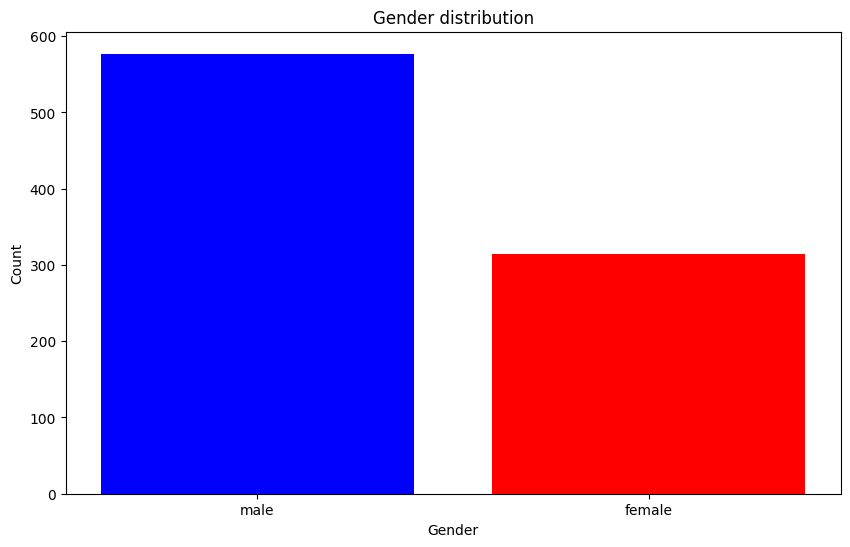

In [19]:
gender_count = df['Sex'].value_counts()
print(f'Number of passenger gender wise:\n{gender_count}')
plt.figure(figsize=(10,6))
plt.bar(gender_count.index,gender_count.values,color=['blue','red'])
plt.title('Gender distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

Number of passenger class wise:
Pclass
3    491
1    216
2    184
Name: count, dtype: int64


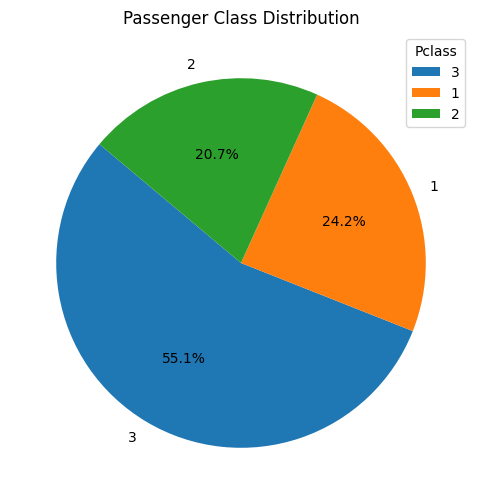

In [20]:
pclass_count = df['Pclass'].value_counts()
print(f'Number of passenger class wise:\n{pclass_count}')
plt.figure(figsize=(10,6))
plt.pie(pclass_count.values,labels=pclass_count.index,autopct='%1.1f%%',startangle=140)
plt.title('Passenger Class Distribution')
plt.legend(title='Pclass')
plt.show()

Number of passenger survived :
Survived
0    549
1    342
Name: count, dtype: int64


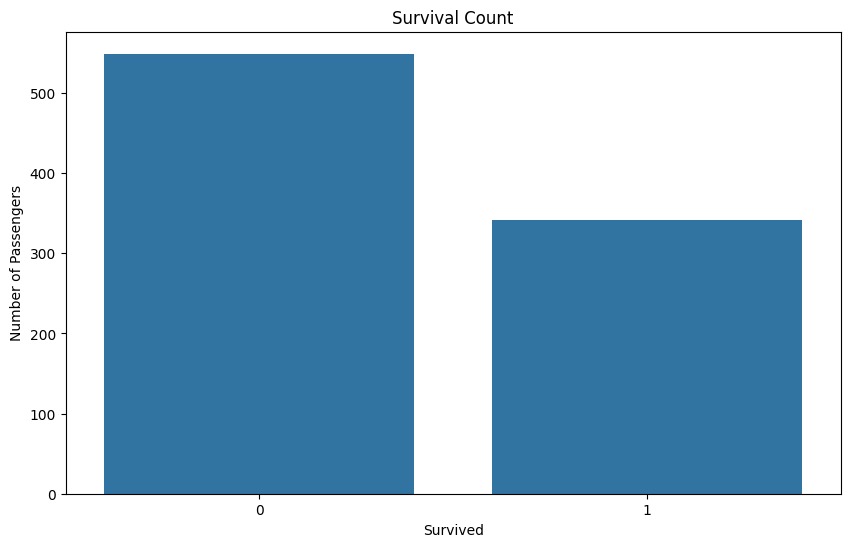

In [21]:
survived_count = df['Survived'].value_counts()
print(f'Number of passenger survived :\n{survived_count}')
plt.figure(figsize=(10,6))
sns.countplot(x='Survived',data=df)
plt.xlabel('Survived')
plt.ylabel('Number of Passengers')
plt.title('Survival Count')
plt.show()

## SURVIVAL PREDICTION MODEL;


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'].fillna('S', inplace=True)
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

print(f"\n--- Building Prediction Model ---\n")

y = df['Survived']
x = df.drop(columns=['Survived'])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=200)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy:\n {accuracy*100:.2f}%\n')

conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{conf_matrix}\n')

class_report = classification_report(y_test, y_pred)
print(f'Clasification Report:\n{class_report}\ \n')


--- Building Prediction Model ---

Model Accuracy:
 79.89%

Confusion Matrix:
[[90 15]
 [21 53]]

Clasification Report:
              precision    recall  f1-score   support

           0       0.81      0.86      0.83       105
           1       0.78      0.72      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179
\ 



C:\Users\User\AppData\Local\Temp\ipykernel_33488\1609744351.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna('S', inplace=True)
